# EDA & Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics

import timeit

import ast

In [2]:
df = pd.read_csv('./data/merged_tracks.csv')

In [3]:
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.14200,0.000010,0.0449,0.321,152.531,283753,3
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.07030,0.000000,0.2240,0.344,71.994,386907,4
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.00419,0.000031,0.1230,0.542,164.092,214164,4
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.03610,0.000000,0.1110,0.211,131.965,246213,4


In [4]:
(ast.literal_eval(df['artist_genre'][4]))

['chicago bop',
 'chicago drill',
 'chicago rap',
 'drill',
 'hip hop',
 'rap',
 'southern hip hop',
 'trap',
 'underground hip hop',
 'viral rap']

In [5]:
for i in range(len(df['artist_genre'])):
    df['artist_genre'][i] = ast.literal_eval(df['artist_genre'][i])
df

C:\Users\sbhew\AppData\Local\Temp\ipykernel_5592\2024546511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist_genre'][i] = ast.literal_eval(df['artist_genre'][i])


,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.4970,123.061,234093,4
1,David Bowie,"[art rock, classic rock, glam rock, permanent ...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.142000,0.000010,0.0449,0.3210,152.531,283753,3
2,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.070300,0.000000,0.2240,0.3440,71.994,386907,4
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.004190,0.000031,0.1230,0.5420,164.092,214164,4
4,Chief Keef,"[chicago bop, chicago drill, chicago rap, dril...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.036100,0.000000,0.1110,0.2110,131.965,246213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,Time Shard,[],Cosmic Carrot - 2022 Remaster,49u25ckAvC2vLaOFAKON5w,0,0.318,0.295,0,-16.727,1,0.0319,0.037400,0.018100,0.0887,0.0506,105.494,328320,4
10060,Eminem,"[detroit hip hop, hip hop, rap]",Darkness,48aI5wAluvSrq55EAR329i,53,0.608,0.623,2,-7.239,1,0.3070,0.008330,0.000039,0.6020,0.1710,74.344,338493,4
10061,Eliseu Carvalho,[],Krafty Days 2022,18IzyQBkLl4qMZj7Pkm4u3,0,0.807,0.580,1,-12.847,1,0.0856,0.013900,0.939000,0.0996,0.5540,119.952,214608,4
10062,Dustin Lynch,"[contemporary country, country, country road, ...",Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.8010,203.803,170560,4


In [6]:
df2 = df
df2

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.4970,123.061,234093,4
1,David Bowie,"[art rock, classic rock, glam rock, permanent ...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.142000,0.000010,0.0449,0.3210,152.531,283753,3
2,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.070300,0.000000,0.2240,0.3440,71.994,386907,4
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.004190,0.000031,0.1230,0.5420,164.092,214164,4
4,Chief Keef,"[chicago bop, chicago drill, chicago rap, dril...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.036100,0.000000,0.1110,0.2110,131.965,246213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,Time Shard,[],Cosmic Carrot - 2022 Remaster,49u25ckAvC2vLaOFAKON5w,0,0.318,0.295,0,-16.727,1,0.0319,0.037400,0.018100,0.0887,0.0506,105.494,328320,4
10060,Eminem,"[detroit hip hop, hip hop, rap]",Darkness,48aI5wAluvSrq55EAR329i,53,0.608,0.623,2,-7.239,1,0.3070,0.008330,0.000039,0.6020,0.1710,74.344,338493,4
10061,Eliseu Carvalho,[],Krafty Days 2022,18IzyQBkLl4qMZj7Pkm4u3,0,0.807,0.580,1,-12.847,1,0.0856,0.013900,0.939000,0.0996,0.5540,119.952,214608,4
10062,Dustin Lynch,"[contemporary country, country, country road, ...",Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.8010,203.803,170560,4


In [7]:
df.corr()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
popularity,1.000000,0.192895,-0.065524,-0.019904,0.250842,0.017434,0.026207,-0.003433,-0.365351,-0.161931,-0.001118,-0.017473,-0.030203,-0.003742
danceability,0.192895,1.000000,0.042490,0.016996,0.251577,-0.077943,0.245583,-0.173220,-0.252817,-0.181788,0.315533,-0.059565,-0.056441,0.168449
energy,-0.065524,0.042490,1.000000,0.052773,0.693486,-0.082063,0.009201,-0.667443,-0.044717,0.209666,0.305518,0.188286,-0.015693,0.184452
key,-0.019904,0.016996,0.052773,1.000000,0.020596,-0.169273,0.011768,-0.018327,0.026378,-0.010549,0.065194,0.036392,0.001856,0.021870
loudness,0.250842,0.251577,0.693486,0.020596,1.000000,-0.040239,0.020669,-0.544223,-0.397549,0.029648,0.224362,0.136289,-0.000372,0.180388
mode,0.017434,-0.077943,-0.082063,-0.169273,-0.040239,1.000000,-0.071944,0.085037,-0.045738,-0.016288,-0.013004,-0.016090,0.002519,-0.029286
speechiness,0.026207,0.245583,0.009201,0.011768,0.020669,-0.071944,1.000000,-0.027166,-0.158999,0.064675,0.021396,0.048066,-0.030080,0.061432
acousticness,-0.003433,-0.173220,-0.667443,-0.018327,-0.544223,0.085037,-0.027166,1.000000,0.109196,-0.096440,-0.133441,-0.168769,-0.015207,-0.173028
instrumentalness,-0.365351,-0.252817,-0.044717,0.026378,-0.397549,-0.045738,-0.158999,0.109196,1.000000,0.059347,-0.129857,0.003452,-0.018795,-0.064118
liveness,-0.161931,-0.181788,0.209666,-0.010549,0.029648,-0.016288,0.064675,-0.096440,0.059347,1.000000,-0.007127,0.017123,-0.004869,0.009990


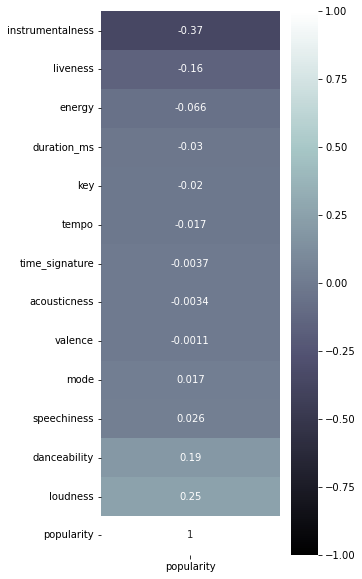

In [8]:
corr = df.corr()[['popularity']].sort_values(by = 'popularity')

plt.figure(figsize = (4, 10))

sns.heatmap(corr,
           cmap = 'bone',
           annot = True,
           vmin = -1,
           vmax = 1);

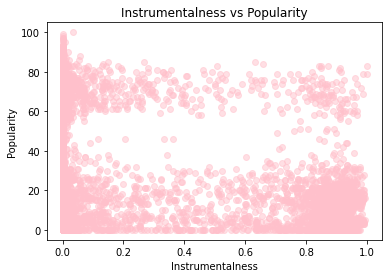

In [9]:
plt.title('Instrumentalness vs Popularity')

plt.scatter(df['instrumentalness'],
            df['popularity'],
           color = 'pink', alpha = 0.5)

plt.xlabel('Instrumentalness')
plt.ylabel('Popularity');

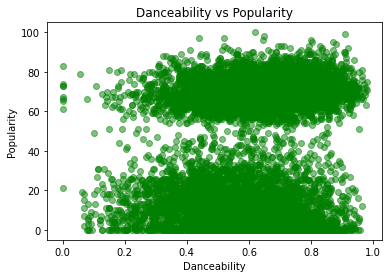

In [10]:
plt.title('Danceability vs Popularity')

plt.scatter(df['danceability'],
            df['popularity'],
           color = 'g', alpha = 0.5)

plt.xlabel('Danceability')
plt.ylabel('Popularity');

In [11]:
df2_genres = df2.explode('artist_genre')
df2_genres.rename(columns={'artist_genre' : 'genre'}, inplace = True)
df2_genres

,artist_name,genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,hip hop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
0,Frank Ocean,lgbtq+ hip hop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
0,Frank Ocean,neo soul,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
0,Frank Ocean,pop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
1,David Bowie,art rock,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.142000,0.000010,0.0449,0.321,152.531,283753,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10062,Dustin Lynch,contemporary country,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4
10062,Dustin Lynch,country,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4
10062,Dustin Lynch,country road,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4
10062,Dustin Lynch,modern country rock,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4


In [12]:
df2_genres.to_excel('./data/artist_genre.xlsx')

In [13]:
df = pd.concat([df.drop(columns = 'artist_genre'), pd.get_dummies(df['artist_genre'].apply(pd.Series),
                                                      prefix='genre')], axis=1)

C:\Users\sbhew\AppData\Local\Temp\ipykernel_5592\817505360.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df.drop(columns = 'artist_genre'), pd.get_dummies(df['artist_genre'].apply(pd.Series),


In [14]:
df

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,genre_southern rock,genre_symphonic rock,genre_vapor soul,genre_roots rock,genre_soft rock,genre_symphonic rock,genre_southern rock,genre_symphonic rock,genre_zolo,genre_swamp rock
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,...,0,0,0,0,0,0,0,0,0,0
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,...,0,0,0,0,0,0,0,0,0,0
2,Kendrick Lamar,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,...,0,0,0,0,0,0,0,0,0,0
3,Electro Dark Project,Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,...,0,0,0,0,0,0,0,0,0,0
4,Chief Keef,Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,Time Shard,Cosmic Carrot - 2022 Remaster,49u25ckAvC2vLaOFAKON5w,0,0.318,0.295,0,-16.727,1,0.0319,...,0,0,0,0,0,0,0,0,0,0
10060,Eminem,Darkness,48aI5wAluvSrq55EAR329i,53,0.608,0.623,2,-7.239,1,0.3070,...,0,0,0,0,0,0,0,0,0,0
10061,Eliseu Carvalho,Krafty Days 2022,18IzyQBkLl4qMZj7Pkm4u3,0,0.807,0.580,1,-12.847,1,0.0856,...,0,0,0,0,0,0,0,0,0,0
10062,Dustin Lynch,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,...,0,0,0,0,0,0,0,0,0,0


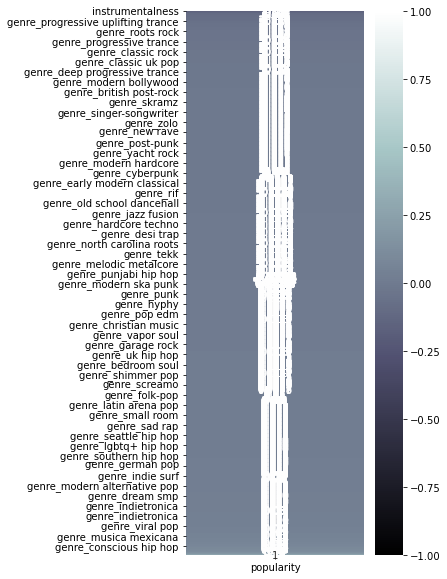

In [15]:
corr = df.corr()[['popularity']].sort_values(by = 'popularity')

plt.figure(figsize = (4, 10))

sns.heatmap(corr,
           cmap = 'bone',
           annot = True,
           vmin = -1,
           vmax = 1);

In [16]:
corr

,popularity
instrumentalness,-0.365351
liveness,-0.161931
genre_trance,-0.158721
genre_workout product,-0.145495
genre_album rock,-0.136812
...,...
danceability,0.192895
genre_dance pop,0.196630
genre_pop,0.232040
loudness,0.250842


In [8]:
df['artist_name'].value_counts()

Johann Sebastian Bach         130
YoungBoy Never Broke Again    110
Workout Music                 110
David Bowie                    90
Taylor Swift                   90
                             ... 
Something's Cursed              1
Sigvaldi Kaldalóns              1
M.I.A.                          1
BRONCHO                         1
Niykee Heaton                   1
Name: artist_name, Length: 3741, dtype: int64

In [9]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness',
       ...
       'genre_southern rock', 'genre_symphonic rock', 'genre_vapor soul',
       'genre_roots rock', 'genre_soft rock', 'genre_symphonic rock',
       'genre_southern rock', 'genre_symphonic rock', 'genre_zolo',
       'genre_swamp rock'],
      dtype='object', length=2588)

In [10]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
def model(model):
    models = model
    models.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {models.score(X_train, y_train)}')
    print(f'Testing r2 score: {models.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, models.predict(X_test))}')
    return print('='*40)

In [12]:
model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.2226714055987783
Testing r2 score: 0.21031977795840961
Testing MSE: 754.7449553205776
KNeighborsRegressor()
Training r2 score: 0.37308961282156927
Testing r2 score: 0.06047998995329584
Testing MSE: 897.95586645469
DecisionTreeRegressor()
Training r2 score: 0.9960853997804991
Testing r2 score: -0.2380079545986704
Testing MSE: 1183.2387747592363
BaggingRegressor()
Training r2 score: 0.8710151173386598
Testing r2 score: 0.3006828393822024
Testing MSE: 668.3795344156341
RandomForestRegressor()
Training r2 score: 0.9069012650977741
Testing r2 score: 0.34971324489364597
Testing MSE: 621.518222476717
AdaBoostRegressor()
Training r2 score: 0.22261436949861546
Testing r2 score: 0.20800048766224344
Testing MSE: 756.9616407612104


In [13]:
df.head(2)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,genre_southern rock,genre_symphonic rock,genre_vapor soul,genre_roots rock,genre_soft rock,genre_symphonic rock,genre_southern rock,genre_symphonic rock,genre_zolo,genre_swamp rock
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,...,0,0,0,0,0,0,0,0,0,0
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df['genre_hip hop']
X = df[['genre_pop', 'genre_hip hop', 'genre_edm', 'energy','valence', 'tempo']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.22139368271013493
Testing r2 score: 0.21295988507664543
Testing MSE: 752.2216459183959
KNeighborsRegressor()
Training r2 score: 0.42349378276081884
Testing r2 score: 0.07590780705999822
Testing MSE: 883.2105723370429
DecisionTreeRegressor()
Training r2 score: 0.9958322420465594
Testing r2 score: -0.3597877823994675
Testing MSE: 1299.6310917085386
BaggingRegressor()
Training r2 score: 0.856431098362714
Testing r2 score: 0.16381033863453554
Testing MSE: 799.1968280213144
RandomForestRegressor()
Training r2 score: 0.8924391660814417
Testing r2 score: 0.22192521257314102
Testing MSE: 743.6529423952367
AdaBoostRegressor()
Training r2 score: 0.12368090993223957
Testing r2 score: 0.12889013316935793
Testing MSE: 832.5721718351206


In [15]:
X = df[['danceability', 'energy', 'key', 'mode', 'valence', 'tempo', 'time_signature']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.04336344062169206
Testing r2 score: 0.05415392042104561
Testing MSE: 904.0020721632858
KNeighborsRegressor()
Training r2 score: 0.282928189133687
Testing r2 score: -0.07567443539395957
Testing MSE: 1028.086852146264
DecisionTreeRegressor()
Training r2 score: 0.9958367115900001
Testing r2 score: -0.6106696168927599
Testing MSE: 1539.413973032128
BaggingRegressor()
Training r2 score: 0.8323738706301288
Testing r2 score: 0.0820794586395942
Testing MSE: 877.3119531673063
RandomForestRegressor()
Training r2 score: 0.8798001319892551
Testing r2 score: 0.14199309105899327
Testing MSE: 820.0488857112605
AdaBoostRegressor()
Training r2 score: 0.09346511883979725
Testing r2 score: 0.08600222405503066
Testing MSE: 873.5627299683862


In [16]:
X = df.drop(columns = ['artist_name', 'track_name', 'track_id', 'popularity'])
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())
model(RidgeCV())
model(LassoCV())

LinearRegression()
Training r2 score: 0.848259491189134
Testing r2 score: 0.6400979155777753
Testing MSE: 343.98010111582664
KNeighborsRegressor()
Training r2 score: 0.30470432994759455
Testing r2 score: -0.014225786796257411
Testing MSE: 969.3566772655007
DecisionTreeRegressor()
Training r2 score: 0.9960905676901023
Testing r2 score: 0.061942793001353635
Testing MSE: 896.5577774683724
BaggingRegressor()
Training r2 score: 0.9030619735195348
Testing r2 score: 0.45105783476714767
Testing MSE: 524.6570933499073
RandomForestRegressor()
Training r2 score: 0.9294702388131668
Testing r2 score: 0.5087293922033815
Testing MSE: 469.53691200872385
AdaBoostRegressor()
Training r2 score: 0.18273791569213726
Testing r2 score: 0.17877214856829104
Testing MSE: 784.8969250292239
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
Training r2 score: 0.8123865994303322
Testing r2 score: 0.7014842941078876
Testing MSE: 285.30944148955376
LassoCV()
Training r2 score: 0.0005630326787589013
Testing r2 score: 0.001869

In [17]:
start = timeit.default_timer()

rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 150, 200, 300],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_leaf_nodes': [None, 2, 3, 5]
}
rf_gs = GridSearchCV(rf, 
                  rf_params,
                  cv = 5,
                  verbose=1)
rf_gs.fit(X_train, y_train)
print(f'Training r2 score: {rf_gs.score(X_train, y_train)}')
print(f'Testing r2 score: {rf_gs.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, rf_gs.predict(X_test))}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training r2 score: 0.9313716035541262
Testing r2 score: 0.5109198344621072
Testing MSE: 467.443374398753
Time to run this code (in seconds): 11391.808565199999


In [18]:
rf_gs.best_params_

{'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 300}

In [19]:
rf = RandomForestRegressor(max_leaf_nodes = None, min_samples_leaf = 2, n_estimators = 300)
rf.fit(X_train, y_train)
print(f'Training r2 score: {rf.score(X_train, y_train)}')
print(f'Testing r2 score: {rf.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, rf.predict(X_test))}')
print(f'Baseline MSE: {metrics.mean_squared_error(y_test, pd.Series(y.mean(), index=range(len(y_test))))}')

Training r2 score: 0.894349285212811
Testing r2 score: 0.49561982240026214
Testing MSE: 482.0665175365754
Baseline MSE: 955.763719547835


In [20]:
ridge = RidgeCV()
ridge.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

In [25]:
start = timeit.default_timer()

ridge = RidgeCV()
ridge_params = {
    'fit_intercept': [True, False],

}
ridge_gs = GridSearchCV(ridge, 
                  ridge_params,
                  cv = 5,
                  verbose=1)
ridge_gs.fit(X_train, y_train)
print(f'Training r2 score: {ridge_gs.score(X_train, y_train)}')
print(f'Testing r2 score: {ridge_gs.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, ridge_gs.predict(X_test))}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Training r2 score: 0.8123865994303322
Testing r2 score: 0.7014842941078876
Testing MSE: 285.30944148955376
Time to run this code (in seconds): 46.398531200000434


In [26]:
ridge_gs.best_params_

{'fit_intercept': True}

In [27]:
knn = KNeighborsRegressor()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [28]:
start = timeit.default_timer()

knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [4, 8, 16, 32],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [15, 30, 45]
}
knn_gs = GridSearchCV(knn, 
                  knn_params,
                  cv = 5,
                  verbose=1)
knn_gs.fit(X_train, y_train)
print(f'Training r2 score: {knn_gs.score(X_train, y_train)}')
print(f'Testing r2 score: {knn_gs.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, knn_gs.predict(X_test))}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training r2 score: 0.1566538962390185
Testing r2 score: 0.10586253133455925
Testing MSE: 854.5810379974414
Time to run this code (in seconds): 8013.285211499999


In [29]:
knn_gs.best_params_

{'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 32}

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Training r2 score: {lr.score(X_train, y_train)}')
print(f'Testing r2 score: {lr.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, lr.predict(X_test))}')
print(f'Baseline MSE: {metrics.mean_squared_error(y_test, pd.Series(y.mean(), index=range(len(y_test))))}')

Training r2 score: 0.848259491189134
Testing r2 score: 0.6400979155777753
Testing MSE: 343.98010111582664
Baseline MSE: 955.763719547835


In [31]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
gs.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
lr.get_params()